
# Project Name: Email Spam Detection With Machine Learning

**Developed By:**: Mominur Rahman

**Portfolio**: https://mominur.dev/

**Github Repository**: https://github.com/mominurr/Email-Spam-Detection-With-Machine-Learning

### Project Overview:

This project demonstrates how to detect email spam using a Naive Bayes classifier. 
The model is trained using text data and then evaluated for accuracy. 
The dataset used for this project is a collection of spam and ham emails.

#### Project Features:
- Data Cleaning: Handles missing values, renames columns, and removes duplicates.
- Visualization: Distribution of spam and ham emails.
- Text Processing: Converts email content to numerical features.
- Model Training: Uses Multinomial Naive Bayes for classification.
- Evaluation: Includes accuracy, confusion matrix, and classification report.


## Importing necessary libraries

In [1]:

# Import necessary libraries
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Loading the dataset

In [2]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

## Displaying the first 5 rows of the dataset

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Explanation of Ham and Spam in the Dataset

In the dataset for email spam detection, the labels represent the classification of emails as either "Ham" or "Spam":

- **Ham**: These are legitimate, non-spam emails. They are normal messages from known sources, such as personal emails or work-related correspondence. In the dataset, "Ham" is labeled as `0`.
  
- **Spam**: These are unwanted or malicious emails, often associated with advertising, phishing, or fraudulent activity. Spam emails are typically sent in bulk without the recipient's consent. In the dataset, "Spam" is labeled as `1`.

The goal of the model is to correctly classify emails into these two categories based on their content, helping users filter out spam and protect against potential threats.


## Data set shape(row,column)

In [4]:
df.shape

(5572, 5)

## Displaying dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Droping unnecessary columns and renaming the remaining columns

In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

## Displaying first 5 rows of the dataset after removing the unnecessary columns

In [7]:
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Checking missing values in the dataset

In [8]:

# Check for missing values
df.isnull().sum()

label    0
text     0
dtype: int64

## Removing duplicate data from the dataset

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

## Dataset shape after removing duplicates

In [10]:
df.shape

(5169, 2)

## Converting labels to numerical values

In [11]:
# Convert labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

## Data Visualization

#### Visualize the distribution of labels

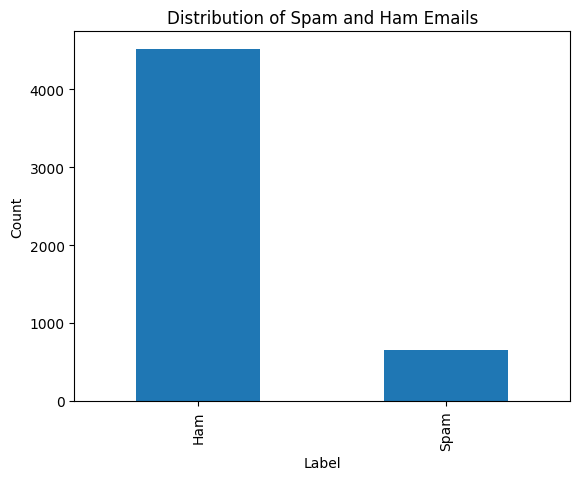

In [12]:

# Visualize the distribution of labels
df['label'].value_counts().plot(kind='bar', title='Distribution of Spam and Ham Emails')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


## Spliting the dataset into training and testing sets, traing dataset is 80% and testing dataset is 20%

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

## Converting text data to numerical features using CountVectorizer

In [14]:

# Convert text data to numerical features
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)


## Training the MODEL using Naive Bayes classifier

In [15]:

# Train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_transformed, y_train)

MultinomialNB()

# Saving the model and vectorizer model for deployment and prediction

In [16]:
# Save the model and vectorizer for future use
joblib.dump(model, 'spam_detection_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

## Predicting on the test data

In [17]:
# Predict on test data
y_pred = model.predict(X_test_transformed)

## Calculating accuracy

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 98.55%


## Generating classification report

In [19]:
# Generate classification report and confusion matrix
report_dict  = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'], output_dict=True)
print("Classification Report:")
# Convert the dictionary into a pandas DataFrame for better visualization
report_df = pd.DataFrame(report_dict).transpose()
report_df

Classification Report:


,precision,recall,f1-score,support
Ham,0.985556,0.997750,0.991615,889.000000
Spam,0.985075,0.910345,0.946237,145.000000
accuracy,0.985493,0.985493,0.985493,0.985493
macro avg,0.985315,0.954048,0.968926,1034.000000
weighted avg,0.985488,0.985493,0.985252,1034.000000


## Classification Report Explanation

The **Classification Report** provides important information about how well the model performed in predicting whether an email is **Ham (non-spam)** or **Spam**. The report shows several metrics for both classes, **Ham** and **Spam**, which are explained below:

### Key Metrics:
1. **Precision**: 
   - This tells us how many of the predicted emails that were labeled as **Ham** or **Spam** were actually correct. 
   - A high precision means the model didn't label too many emails incorrectly.

2. **Recall**: 
   - This shows how many of the actual **Ham** or **Spam** emails were correctly predicted by the model. 
   - A high recall means the model was able to catch most of the true **Ham** or **Spam** emails.

3. **F1-Score**: 
   - This combines both precision and recall into one score. It's useful when you need a balance between precision and recall.
   - A higher F1-Score indicates better overall performance.

4. **Support**: 
   - This tells us how many actual **Ham** or **Spam** emails were in the dataset.

### The Results:
- **Ham** emails:
  - Precision: **98.56%** — Very few **Ham** emails were misclassified as **Spam**.
  - Recall: **99.77%** — The model correctly identified most of the **Ham** emails.
  - F1-Score: **99.16%** — Overall, the model performed well on **Ham** emails.

- **Spam** emails:
  - Precision: **98.51%** — The model correctly identified most **Spam** emails.
  - Recall: **91.03%** — Some **Spam** emails were missed, but most were caught.
  - F1-Score: **94.62%** — The model performed reasonably well on **Spam** emails.

- **Overall Performance**:
  - **Accuracy**: **98.55%** — The model correctly predicted **98.55%** of all emails.
  - **Macro Average**: Averages precision, recall, and F1-score across **Ham** and **Spam** emails. It gives us an overall picture of the model's performance.
  - **Weighted Average**: Averages precision, recall, and F1-score, but it gives more weight to classes with more samples (in this case, **Ham**).

### Conclusion:
- The model performed very well, especially with **Ham** emails, and showed strong results in identifying **Spam** emails as well.


## Generating confusion matrix

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
# Convert the confusion matrix into a pandas DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Ham', 'Spam'], columns=['Predicted Ham', 'Predicted Spam'])
conf_matrix_df

Confusion Matrix:


,Predicted Ham,Predicted Spam
Ham,887,2
Spam,13,132


## Live Project
The application is hosted live on Streamlit, making it easily accessible for users to input email text and get real-time predictions.

**The live project can be accessed at the following URL:** [Live Web App - Email Spam Detection](https://email-spam-detections.streamlit.app)



## OR

## Deploying an Email Spam Detection Model via a Flask Web Application

This Flask application serves as a user interface for detecting whether a given email is spam or not. It uses a pre-trained model saved as `spam_detection_model.pkl` and a vectorizer file `vectorizer.pkl`.

---

### Features:
1. Accepts email text input from the user through a web form.
2. Utilizes the pre-trained spam detection model (`spam_detection_model.pkl`) and vectorizer (`vectorizer.pkl`).
3. Predicts whether the email is "Spam" or "Ham" and displays the result dynamically on the same page.

---

### Deployment Instructions:
To deploy the application, follow these steps:

1. **Ensure the required files exist**:
   - Verify that the following files are in the same directory as your Flask application file (`flax_app.py`):
     - `spam_detection_model.pkl`: The trained Naive Bayes classifier.
     - `vectorizer.pkl`: The CountVectorizer used to preprocess text data.

2. **Install Dependencies**:
   - Ensure Flask and joblib are installed. If not, install them using:
     ```bash
     pip install flask joblib
     ```

3. **Run the Flask Application**:
   - Start the server by running the following command in your terminal:
     ```bash
     python flax_app.py
     ```

4. **Access the Application**:
   - Open your web browser and navigate to `http://127.0.0.1:5000`.

5. **Provide Input**:
   - Type or paste the content of the email you want to test in the input form provided on the webpage.

6. **View Results**:
   - Click the "Submit" button to send the input to the server. The application will process the input and display whether the email is "Spam" or "Ham" on the same page.

---

### Example Workflow:
1. **Input Example**:
   - Email Content:
     ```
     Congratulations! You have won a lottery of $1,000,000. Click here to claim your prize.
     ```

2. **Output**:
   - Predicted Label: **Spam**

3. **Another Input Example**:
   - Email Content:
     ```
     Hi John, just wanted to confirm our meeting for tomorrow at 10 AM. Let me know if that works.
     ```

4. **Output**:
   - Predicted Label: **Ham**

---

### File Requirements:
- **spam_detection_model.pkl**: A trained Naive Bayes classifier for spam detection.
- **vectorizer.pkl**: A CountVectorizer object for preprocessing text data.

---

### Notes:
- Ensure proper error handling for invalid or empty inputs in the Flask app.
- Use `flax_app.run(debug=True)` during development for easier debugging. Disable this in production mode.

